In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesRegressor 

In [2]:
carpred=pd.read_csv('car data.csv')

In [3]:
carpred.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
carpred.shape

(301, 9)

In [5]:
carpred.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
print(carpred['Owner'].unique())
print(carpred['Transmission'].unique())
print(carpred['Fuel_Type'].unique())
print(carpred['Seller_Type'].unique())


[0 1 3]
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']


In [7]:
#check missing value
carpred.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
#no missing value

In [9]:
carpred.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
carpred.drop('Car_Name',axis=1,inplace=True)

In [11]:
#create new feature
carpred['Current_year']=2020
carpred.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [12]:
carpred['Number_of_year']=carpred['Current_year']-carpred['Year']

In [13]:
carpred.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,Number_of_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [14]:
carpred.drop(['Year','Current_year'],axis=1,inplace=True)
carpred.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [15]:
carpred=pd.get_dummies(carpred,drop_first=True)



we droped the 1st variable feature set to avoide dummie variable trap.The Dummy Variable trap is a scenario in which the independent variables are multicollinear - a scenario in which two or 
more variables are highly correlated; in simple terms one variable can be predicted from the others.

In [16]:
carpred.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [17]:
#Coorelation between features

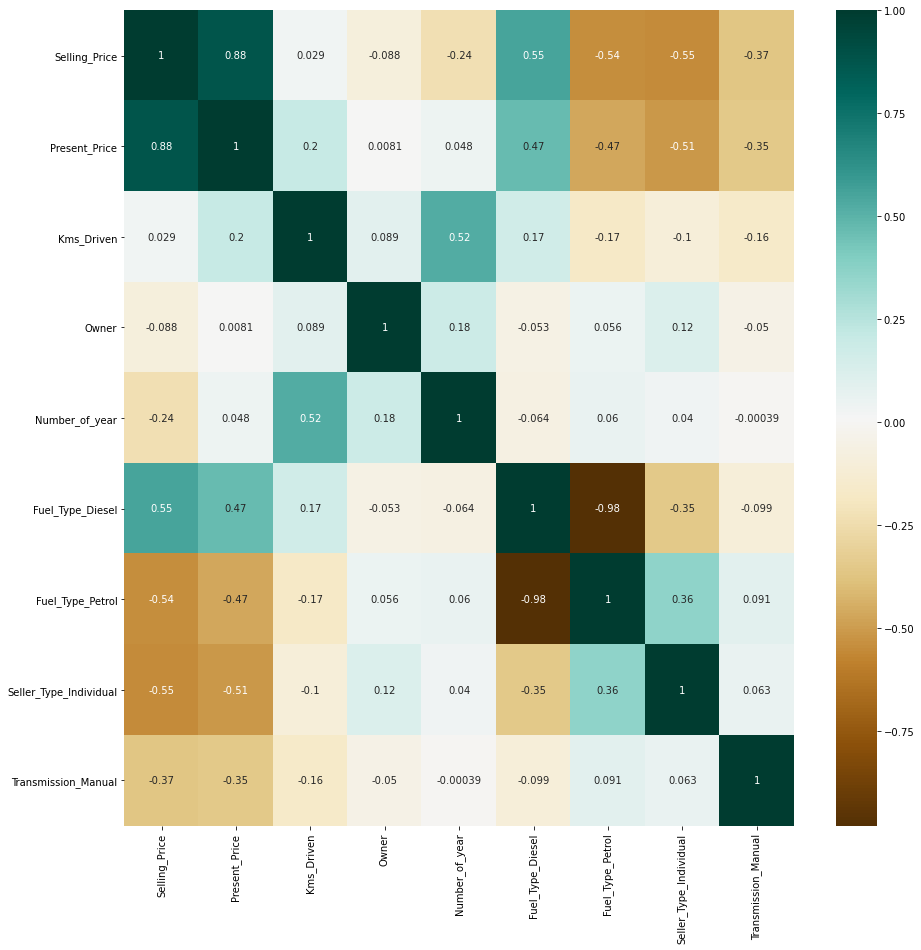

In [18]:
corrmat=carpred.corr()
Features =corrmat.index
plt.figure(figsize=(15,15))
#plot heatmap
g=sns.heatmap(carpred[Features].corr(),annot=True,cmap='BrBG')

X=Independent Feature
y=Dependent feature

In [19]:
x=carpred.iloc[:,1:]
y=carpred['Selling_Price']

## Fearture Importance

In [20]:
model=ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)

[0.37849664 0.03779553 0.00050636 0.08130651 0.2252515  0.00866773
 0.13060217 0.13737355]


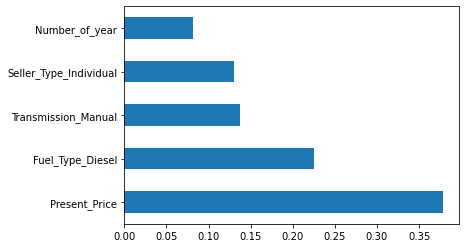

In [21]:
#plot graph of feature importance 
f_impo=pd.Series(model.feature_importances_,index=x.columns)
f_impo.nlargest(5).plot(kind='barh')
plt.show()

Train_test Split

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## Hyperparameter 

RandomizedSeachCV (it helps to find the best parameters for model) 

In [23]:
from sklearn.model_selection import RandomizedSearchCV

In [24]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [25]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


## Model

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [27]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5,  random_state=42, n_jobs = 1)

In [32]:
rf_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [33]:
predictions=rf_random.predict(x_test)
predictions

array([ 2.87348409,  2.96545947, 13.65915119, 17.21153258,  4.70519608,
        6.98035806,  0.51073238,  3.04919157, 10.22934761,  0.41191436,
       22.51171073,  1.15746464, 13.86371954, 22.41072945,  1.15668991,
       10.87803732,  5.16609208,  5.12594737,  5.1035714 , 10.21313854,
        7.18329248,  6.50384993,  0.2395449 , 22.41072945,  0.40769275,
        7.75125942,  0.2371449 ,  0.25308522,  2.82875439,  1.1745309 ,
       14.05317793, 10.5974083 ,  2.89246126,  1.1588554 ,  5.77068369,
        4.23921583,  1.17090759,  4.19273986,  3.549177  ,  1.23673479,
        0.55097631,  0.70709188,  0.29811201,  0.43464815,  5.17329253,
        7.76600804,  2.69663619,  2.84729188,  5.64185279,  0.24735218,
        0.25121951,  5.14113357, 13.65552738,  5.05387133,  1.16379035,
        3.45404546,  4.83827045,  2.69417042,  0.64620041,  6.52195497,
        0.24665861])

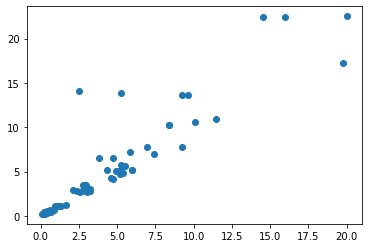

In [34]:
plt.scatter(y_test,predictions)